In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score,recall_score,precision_score, mean_absolute_error,mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression

In [25]:
data_file = "data\\train.csv"
test_file = "data\\test.csv"
sub_file = "data\\sub.csv"
plt.rc('font',size=6)
SEED=1234

In [26]:
housing_data = pd.read_csv(data_file)
display(housing_data.head())
display(housing_data.describe())

y=housing_data["SalePrice"]
housing_data=housing_data.drop(["SalePrice","Id"],axis=1)
features = housing_data.columns
num_features = len(features)-2

cats = ['MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

non_cats= [c for c in features if c not in cats]
onehot_data = pd.get_dummies(data = housing_data,
                        prefix = cats,
                        columns = cats)
onehot_data = onehot_data.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

for f in non_cats:
    c = housing_data[f].corr(y)
    CORRPAR="~~WEAK~~"
    if abs(c) >0.5:
        CORRPAR = "++HIGH++"
    elif abs(c)<0.25:
        CORRPAR = "--LOW--"
        print (f"Dropping Feature {f}")
        #onehot_data=
        onehot_data.drop(f,axis=1)
        
    print (f"Correlation between {f} and Sale price is {c} - {CORRPAR}")
#pre_drop_f = ["2ndFlrSF","1stFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]    
X_train,X_cv,y_train,y_cv=train_test_split(onehot_data,y,train_size=0.70,random_state = SEED)
y_train=np.asarray(y_train)
X_train=np.asarray(X_train)
y_cv=np.asarray(y_cv)
X_cv=np.asarray(X_cv)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Dropping Feature MSSubClass
Correlation between MSSubClass and Sale price is -0.08428413512659517 - --LOW--
Correlation between LotFrontage and Sale price is 0.351799096570678 - ~~WEAK~~
Correlation between LotArea and Sale price is 0.2638433538714056 - ~~WEAK~~
Correlation between YearBuilt and Sale price is 0.5228973328794968 - ++HIGH++
Correlation between YearRemodAdd and Sale price is 0.5071009671113862 - ++HIGH++
Correlation between MasVnrArea and Sale price is 0.4774930470957155 - ~~WEAK~~
Correlation between BsmtFinSF1 and Sale price is 0.3864198062421531 - ~~WEAK~~
Dropping Feature BsmtFinSF2
Correlation between BsmtFinSF2 and Sale price is -0.011378121450215137 - --LOW--
Dropping Feature BsmtUnfSF
Correlation between BsmtUnfSF and Sale price is 0.2144791055469689 - --LOW--
Correlation between TotalBsmtSF and Sale price is 0.6135805515591954 - ++HIGH++
Correlation between 1stFlrSF and Sale price is 0.6058521846919145 - ++HIGH++
Correlation between 2ndFlrSF and Sale price is 0.3

W1(304, 64):
 [[-0.11334506  0.05512269 -0.1108562  ...  0.08490945  0.05089378
   0.09595349]
 [-0.0668121  -0.03303619 -0.01450362 ...  0.12445696  0.02984601
  -0.05545963]
 [ 0.10284957  0.05827123 -0.05225837 ... -0.12471262  0.03945769
  -0.04673815]
 ...
 [ 0.06167598 -0.02271384 -0.06103925 ... -0.11713105 -0.0299785
  -0.01416408]
 [ 0.00165547 -0.12424465  0.08612305 ...  0.05933985  0.00231722
   0.07974298]
 [ 0.0793061   0.11341467 -0.0485691  ...  0.06602271 -0.04148573
  -0.03300803]] 
b1(64,): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
W2(64, 1):
 [[ 0.22660148]
 [-0.00566527]
 [ 0.11471963]
 [ 0.29383057]
 [ 0.08637092]
 [-0.14397162]
 [ 0.04912016]
 [-0.24414521]
 [ 0.1737332 ]
 [-0.17557135]
 [-0.15208025]
 [-0.1388102 ]
 [ 0.06177819]
 [ 0.2897454 ]
 [ 0.18638247]
 [-0.2130211 ]
 [ 0.14217272]
 [ 0.20717937]
 [-0.24

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 64)             │        19,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer5 (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,065 (125.25 KB)

 Trainable params: 32,065 (125.25 KB)

 Non-trainable params: 0 (0.00 B)

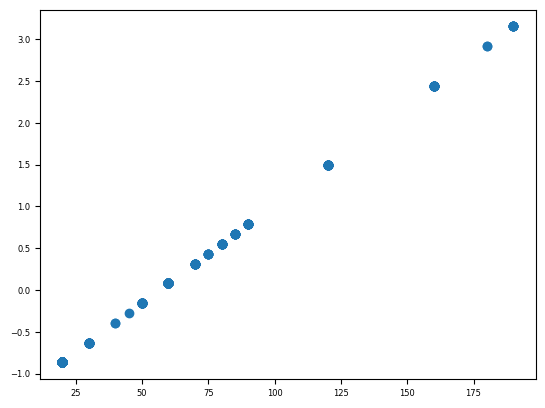

In [27]:
#Define Model
tf.random.set_seed(SEED)  # applied to achieve consistent results
scaler_linear = StandardScaler()
# Compute the mean and standard deviation of the training set then transform it
X_train_scaled=scaler_linear.fit_transform(X_train)
X_cv_scaled=scaler_linear.transform(X_cv)
plt.scatter(X_cv[:,0],X_cv_scaled[:,0])
n=X_train.shape[1]
model = Sequential(
    [
        tf.keras.Input(shape=(n,)),
        Dense(64, activation="relu", name="layer1",kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
        Dense(64, activation="relu", name="layer2",kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
        Dense(64, activation="relu", name="layer3",kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
        Dense(64, activation="relu", name="layer4",kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),

        Dense(1,name="layer5"),
    ]
)
W1, b1 = model.get_layer("layer1").get_weights()
W5, b5 = model.get_layer("layer5").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W5.shape}:\n", W5, f"\nb2{b5.shape}:", b5)

model.summary()

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.3 and 30 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3434904821.054796 Validation Error 2507226880.3455853, features: 304


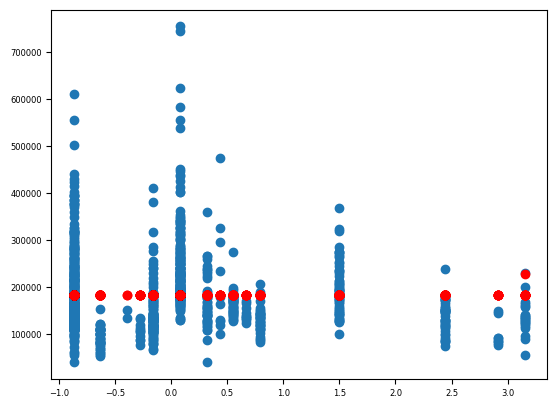

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.3 and 100 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 1030030509.4541516 Validation Error 1641184091.8711889, features: 304


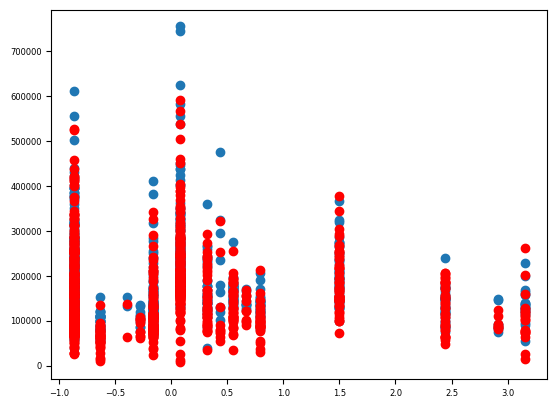

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.3 and 300 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432769397.728307 Validation Error 2507438487.432123, features: 304


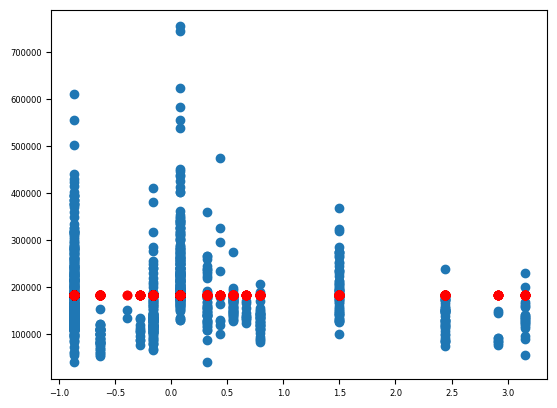

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.3 and 1000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432768548.107212 Validation Error 2507478964.251814, features: 304


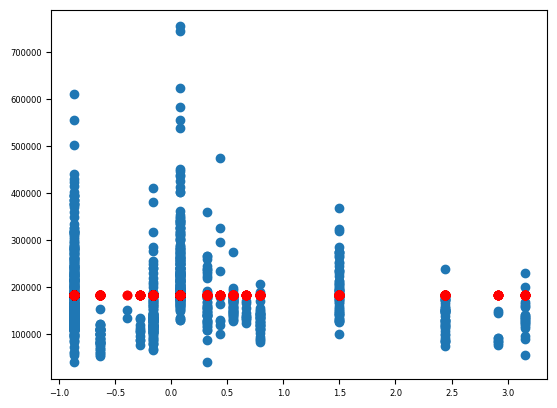

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.3 and 10000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432769607.8413095 Validation Error 2507428894.13586, features: 304


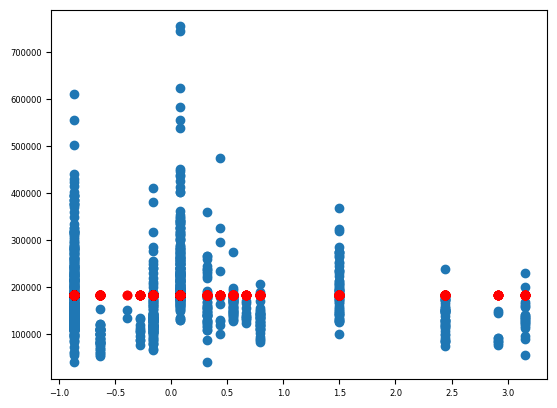

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.1 and 30 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432767164.734473 Validation Error 2507552036.082209, features: 304


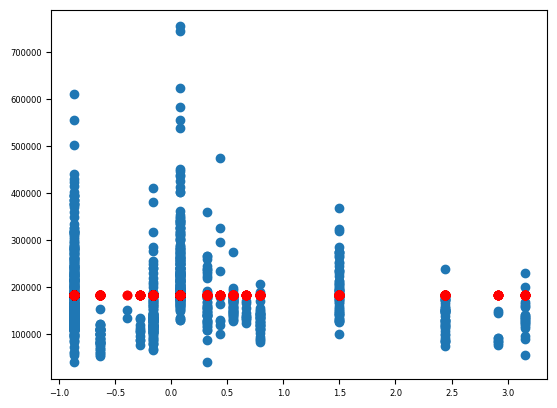

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.1 and 100 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432767139.9040866 Validation Error 2507553447.9583526, features: 304


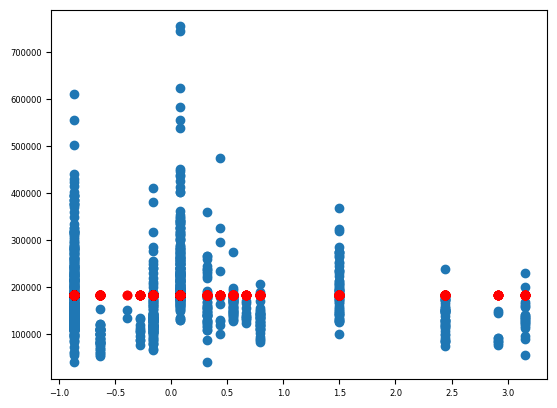

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.1 and 300 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432767136.987503 Validation Error 2507553614.066067, features: 304


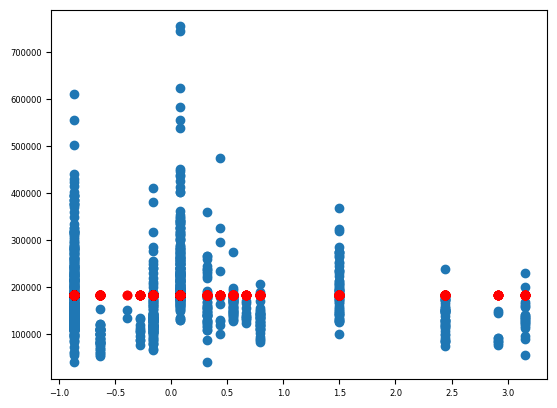

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.1 and 1000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432767138.4456725 Validation Error 2507553531.012088, features: 304


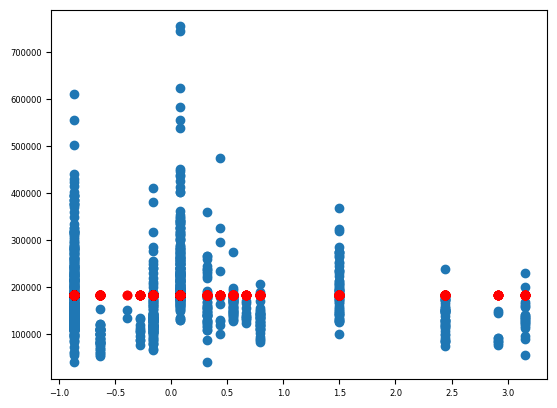

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.1 and 10000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432767103.5169854 Validation Error 2507555524.3749733, features: 304


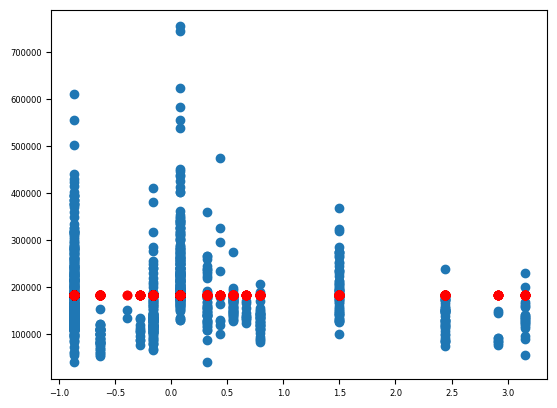

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.03 and 30 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766319.23215 Validation Error 2507602658.4785333, features: 304


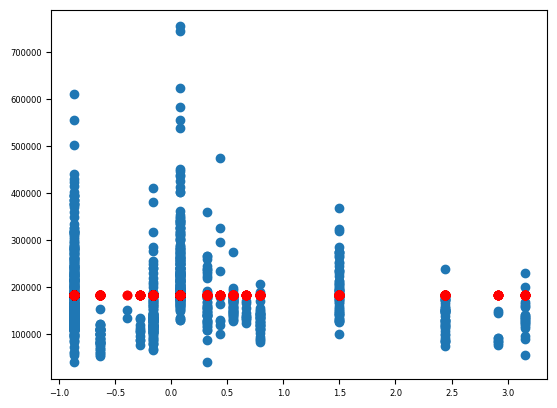

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.03 and 100 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766498.847494 Validation Error 2507591428.9537835, features: 304


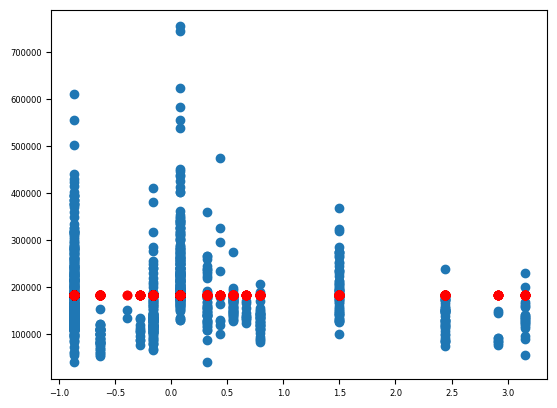

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.03 and 300 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766500.1945796 Validation Error 2507591345.78872, features: 304


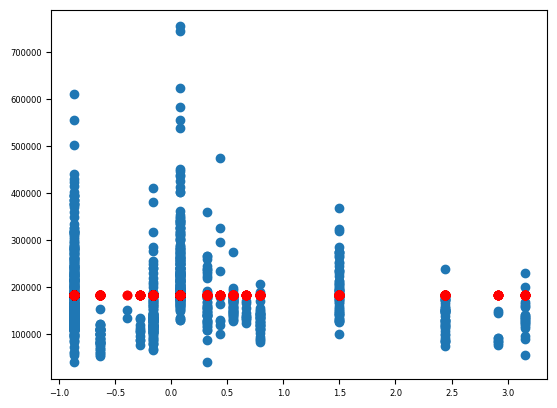

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.03 and 1000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766500.1945796 Validation Error 2507591345.78872, features: 304


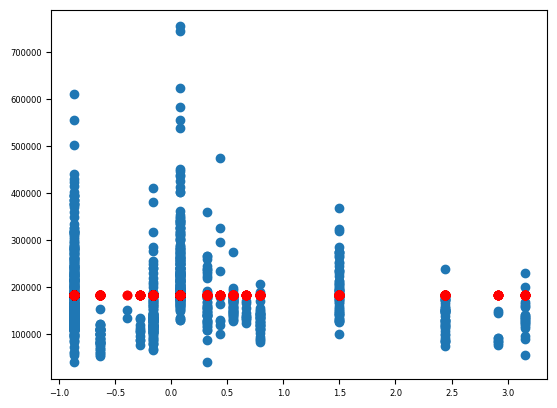

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.03 and 10000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766498.847494 Validation Error 2507591428.9537835, features: 304


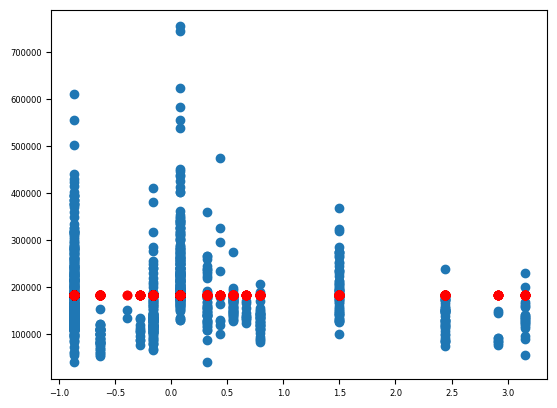

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.01 and 30 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432764921.272161 Validation Error 2507702421.560714, features: 304


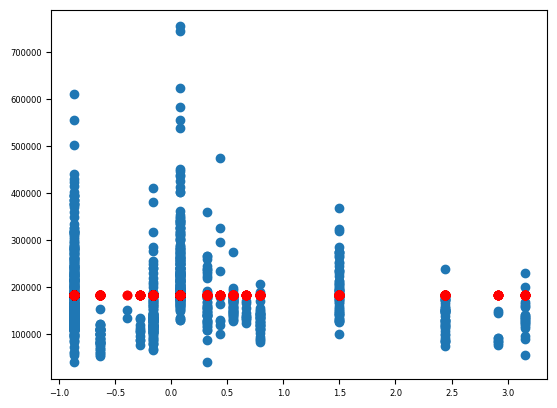

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.01 and 100 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766244.730498 Validation Error 2507607401.169366, features: 304


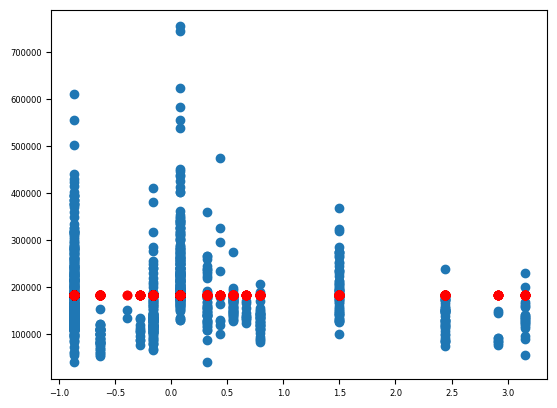

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.01 and 300 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766278.6153193 Validation Error 2507605237.738317, features: 304


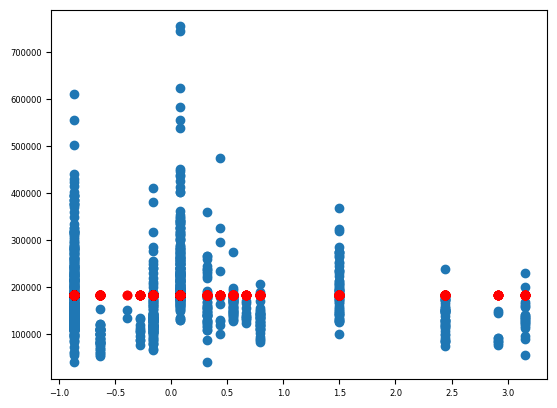

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.01 and 1000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766278.6153193 Validation Error 2507605237.738317, features: 304


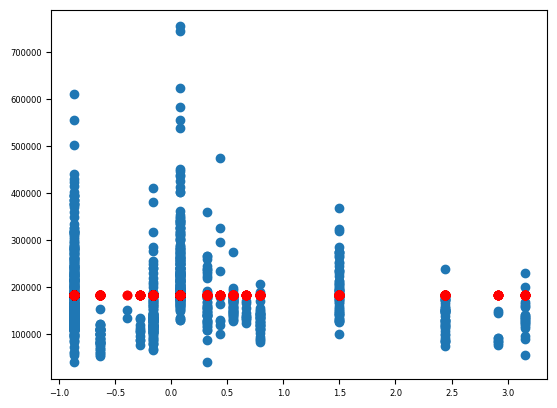

X_train Shape (1021, 304) Y_train Shape (1021,)
Running with LR: 0.01 and 10000 epochs
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
X_train Shape (1021, 304) Yhat_train Shape (1021, 1), features: 304
Training Error: 3432766279.9218774 Validation Error 2507605154.532726, features: 304


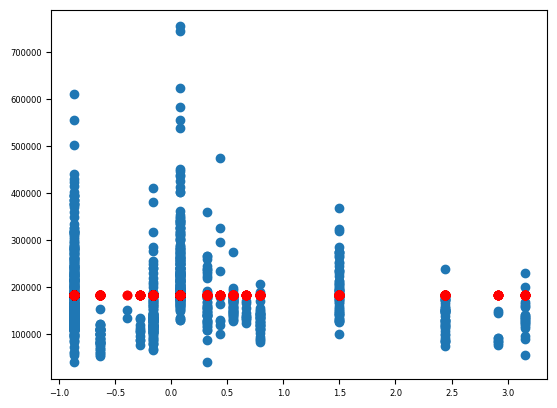

Identified best LR as 0.1 and Epoch: 100 with error 1641184091.8711889


In [29]:
train_mses = []
cv_mses = []
models=[]
learning_rates =[0.3,0.1,0.03,0.01]#,0.001,0.0001],0.00001,0.000001]
epochs = [30,100,300,1000,10000]#, 3000,30000,300000]
for lr in learning_rates:
     for ep in epochs:

          print(f"X_train Shape {X_train.shape} Y_train Shape {y_train.shape}")
          print(f"Running with LR: {lr} and {ep} epochs")


          model.compile(
          loss="mse",
          optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
          )
          model.fit(
               X_train_scaled, y_train,
               epochs=ep,
               verbose=0
          )
          models.append(model)
          yhat_train = model.predict(X_train_scaled) 
          train_mse = mean_squared_error(y_train, yhat_train) / 2
          yhat_cv = model.predict(X_cv_scaled)
          cv_mse = mean_squared_error(y_cv, yhat_cv) / 2
          train_mses.append(train_mse)
          cv_mses.append(cv_mse)
          print(f"X_train Shape {X_train.shape} Yhat_train Shape {yhat_train.shape}, features: {n}")
          print(f"Training Error: {train_mse} Validation Error {cv_mse}, features: {n}")

          plt.scatter(X_train_scaled[:,0],y_train)
          plt.scatter(X_train_scaled[:,0],yhat_train,color="r")
          plt.show()
best_i = np.argmin(cv_mses)
best_model = models[best_i]
print(f"Identified best LR as {learning_rates[best_i]} and Epoch: {epochs[best_i]} with error {cv_mses[best_i]}")